In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Load dataset and changes in dataset

In [2]:
df = pd.read_csv('thesisbangladataset.csv')

In [3]:
df.sample(2)

,Unnamed: 0,cleaned,Class,Label
5620,5620,তোর যে মা আছে সে তার মামা কাছে চুদা খাছে এটা ই...,AG,1
5880,5880,ইসলাম কোন ধর্ম না এটা জঙ্গি তৈরি আস্থানা বুঝলি...,AG,1


In [4]:
df.shape

(11326, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11326 entries, 0 to 11325
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11326 non-null  int64 
 1   cleaned     11326 non-null  object
 2   Class       11326 non-null  object
 3   Label       11326 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 354.1+ KB


In [6]:
df.rename(columns={'cleaned':'text','Class':'target'},inplace=True)

In [7]:
df.head()

,Unnamed: 0,text,target,Label
0,0,এলাকায় আসিস খুন করে ফেলে রাখবো তকে আমারে ত চিন...,AG,1
1,1,কুরআন কিতাব টাই তো ভুল এবং অন্য ধর্ম থেকে ঝাড়া...,AG,1
2,2,বাংলাদেশি খেলোয়ারদের সাথে খারাপ আচরনের জন্য আই...,NoAG,0
3,3,তুই ভুলে যাইস না আগের কথা সামনে পাইলে কিন্তু ছ...,AG,1
4,4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,NoAG,0


In [8]:
df["target"].value_counts()

target
NoAG    5845
AG      5481
Name: count, dtype: int64

# Label encoder

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [10]:
print (label_encoder)

LabelEncoder()


In [11]:
df["target"] = label_encoder.fit_transform(df["target"])

In [12]:
df.head()

,Unnamed: 0,text,target,Label
0,0,এলাকায় আসিস খুন করে ফেলে রাখবো তকে আমারে ত চিন...,0,1
1,1,কুরআন কিতাব টাই তো ভুল এবং অন্য ধর্ম থেকে ঝাড়া...,0,1
2,2,বাংলাদেশি খেলোয়ারদের সাথে খারাপ আচরনের জন্য আই...,1,0
3,3,তুই ভুলে যাইস না আগের কথা সামনে পাইলে কিন্তু ছ...,0,1
4,4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0


# Removing unnecessary column

In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
df.head()

,text,target,Label
0,এলাকায় আসিস খুন করে ফেলে রাখবো তকে আমারে ত চিন...,0,1
1,কুরআন কিতাব টাই তো ভুল এবং অন্য ধর্ম থেকে ঝাড়া...,0,1
2,বাংলাদেশি খেলোয়ারদের সাথে খারাপ আচরনের জন্য আই...,1,0
3,তুই ভুলে যাইস না আগের কথা সামনে পাইলে কিন্তু ছ...,0,1
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0


# Chacked duplicate and missing value

In [15]:
df.shape

(11326, 3)

In [16]:
df.isnull().sum()

text      0
target    0
Label     0
dtype: int64

In [17]:
df.duplicated().sum()

154

In [18]:
df= df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [19]:
df.shape

(11172, 3)

# removing stopword

In [20]:
custom_bengali_stopwords = [
    "আমি","কি","সে","জন্য","এবং","এক","একটা","এ","ও","যে","এর","মনে","সব","নাই","আমরা","কেন","করা","সাথে","তো","না","করে","আমার","একটি",
    "যদি","দিয়ে","আর","নিয়ে","ছিল","হবে","থেকে","তার","কিন্তু","করা","এটা","এই"]  # Add more as needed

# Define a function to remove stop words from a given text using custom stop words
def remove_stopwords(text):
  
    words = text.split()    
    words = [word for word in words if word not in custom_bengali_stopwords]
    return ' '.join(words)
# Apply the modified remove_stopwords function to the 'text' column
df['text'] = df['text'].apply(remove_stopwords)

In [21]:
df.head(5)

,text,target,Label
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0


In [22]:
#NUM OF WORDS
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11172.000000,11172.000000,11172.0
mean,107.858575,17.807107,1.0
std,135.471050,21.627194,0.0
min,6.000000,1.000000,1.0
25%,48.000000,8.000000,1.0
50%,78.000000,13.000000,1.0
75%,124.000000,21.000000,1.0
max,3000.000000,478.000000,1.0


In [26]:
df.head(5)

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


# Corpus

In [27]:
spam_corpus=[]
for msg in df[df['target']==0]['text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [28]:
len(spam_corpus)

68394

In [29]:
from collections import Counter
Counter(spam_corpus).most_common(10)

[('ধর্ম', 514),
 ('তোর', 507),
 ('কে', 406),
 ('ইসলাম', 359),
 ('হিন্দু', 356),
 ('তুই', 347),
 ('কোন', 294),
 ('আছে', 291),
 ('কথা', 282),
 ('তোদের', 282)]

In [30]:
ham_corpus=[]
for msg in df[df['target']==1]['text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [31]:
len(ham_corpus)

130192

In [32]:
from collections import Counter
Counter(ham_corpus).most_common(10)

[('করতে', 654),
 ('তারা', 603),
 ('কিছু', 579),
 ('আছে', 548),
 ('আমাদের', 547),
 ('হয়', 515),
 ('ভাল', 493),
 ('অনেক', 486),
 ('তাদের', 474),
 ('হয়', 438)]

In [33]:
df.head(5)

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


# Removing digits

In [34]:
import re

In [35]:
bangla_digits_pattern = '[০১২৩৪৫৬৭৮৯]'
total_digit_count = 0
for index, row in df.iterrows():
    text = row['text']
    digit_count = len(re.findall(bangla_digits_pattern, text))
    total_digit_count += digit_count
print("Total Bangla digits in the dataset: ", total_digit_count)

Total Bangla digits in the dataset:  2629


In [36]:
bangla_digits_pattern = '[০১২৩৪৫৬৭৮৯]'
for index, row in df.iterrows():
    text = row['text']
    text_without_bangla_digits = re.sub(bangla_digits_pattern, '', text)
    df.at[index, 'text'] = text_without_bangla_digits

In [37]:
bangla_digits_pattern_after = '[০১২৩৪৫৬৭৮৯]'
total_digit_count_after = 0
for index, row in df.iterrows():
    text = row['text']
    digit_count = len(re.findall(bangla_digits_pattern_after, text))
    total_digit_count_after += digit_count
print("Total Bangla digits in the dataset: ", total_digit_count_after)

Total Bangla digits in the dataset:  0


# EDA

In [38]:
df['target'].value_counts()

target
1    5705
0    5467
Name: count, dtype: int64

In [39]:
df["target"].value_counts()

target
1    5705
0    5467
Name: count, dtype: int64

In [40]:
import matplotlib.pyplot as plt

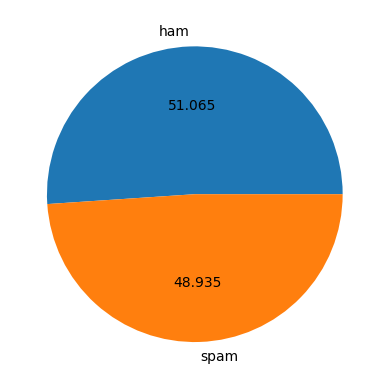

In [41]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.3f")
plt.show()

In [42]:
import nltk

In [43]:
df['text'].apply(len)

0         58
1        110
2         80
3         45
4        187
        ... 
11321    102
11322    226
11323     83
11324    163
11325     24
Name: text, Length: 11172, dtype: int64

In [44]:
# count word character and sentence
df['num_characters'] = df['text'].apply(len)

In [45]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [46]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [47]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,11172.000000,11172.000000,11172.0
mean,107.623255,17.719388,1.0
std,135.352398,21.586215,0.0
min,6.000000,1.000000,1.0
25%,48.000000,8.000000,1.0
50%,78.000000,13.000000,1.0
75%,123.000000,20.000000,1.0
max,3000.000000,478.000000,1.0


In [48]:
df.head()

,text,target,Label,num_words,num_sentences,num_characters
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187


In [49]:
import seaborn as sns

In [50]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5705.000000,5705.000000,5705.0
mean,140.151271,22.744084,1.0
std,175.530595,27.975503,0.0
min,6.000000,1.000000,1.0
25%,68.000000,11.000000,1.0
50%,101.000000,17.000000,1.0
75%,150.000000,24.000000,1.0
max,3000.000000,478.000000,1.0


In [51]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5467.000000,5467.000000,5467.0
mean,73.679166,12.475947,1.0
std,55.066213,9.041430,0.0
min,8.000000,1.000000,1.0
25%,38.000000,7.000000,1.0
50%,57.000000,10.000000,1.0
75%,92.000000,15.000000,1.0
max,739.000000,122.000000,1.0


<Axes: xlabel='num_characters', ylabel='Count'>

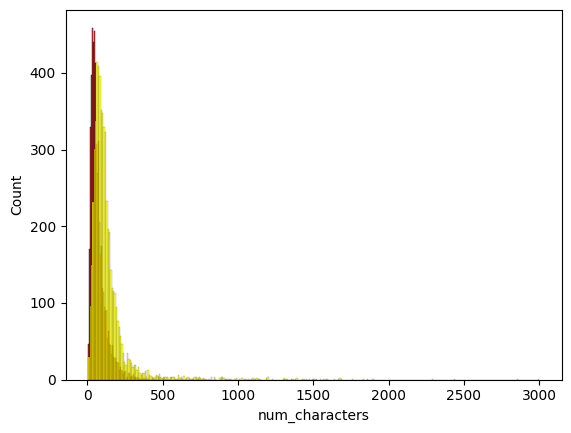

In [52]:
# 0 is spam and 1 is ham
sns.histplot(df[df['target']==0]['num_characters'],color='red')
sns.histplot(df[df['target']==1]['num_characters'],color='yellow')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


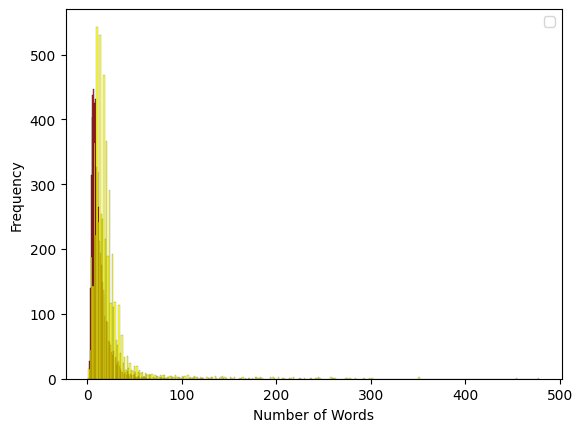

In [53]:
sns.histplot(df[df['target']==0]['num_words'],color='red')
sns.histplot(df[df['target']==1]['num_words'],color='yellow')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()

plt.savefig('histogram.png', bbox_inches='tight', pad_inches=1)

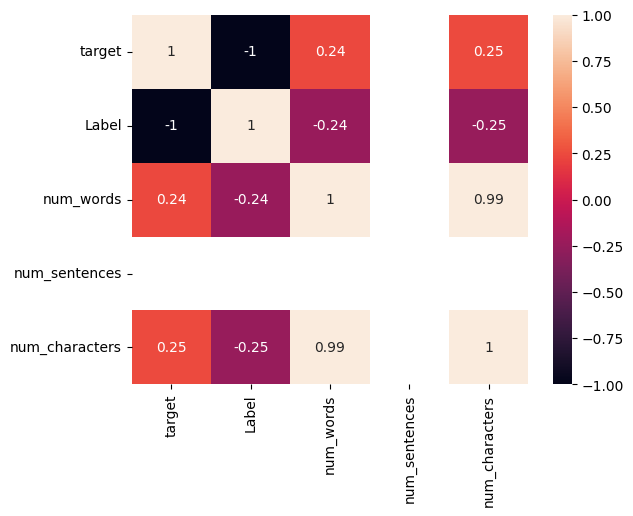

In [54]:
#  0 spam and 1 ham we you have a DataFrame df and you want to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True)

plt.savefig('heatmap.png', bbox_inches='tight')

# wordcloud

In [55]:
import string
import nltk
from nltk.corpus import stopwords
import string
# Replace 'your/actual/nltk_data_directory' with the path you want to use
nltk.data.path.append('your/actual/nltk_data_directory')
# Download Bengali stopwords data
nltk.download('stopwords', download_dir='your/actual/nltk_data_directory')

def transform_text(text):
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Specify language as 'bengali'
    for i in text:
        if i not in stopwords.words('bengali') and i not in string.punctuation:
            y.append(i)
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     your/actual/nltk_data_directory...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [56]:
df['transformed_text'] = df['text'].apply(transform_text)

In [57]:
from wordcloud import WordCloud
wc = WordCloud(font_path='kalpurush.ttf',width=500,height=500,min_font_size=10,background_color='white')

In [58]:
# 1 is ham
ham_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

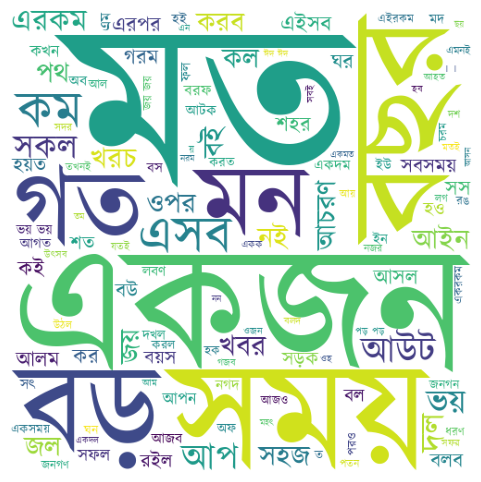

In [59]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.axis('off')  # to turn off axis if needed
plt.savefig('ham_wordcloud.png')

In [60]:
plt.savefig('spam_wordcloud.png', bbox_inches='tight', pad_inches=0)

<Figure size 640x480 with 0 Axes>

In [61]:
# 0 spam
spam_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

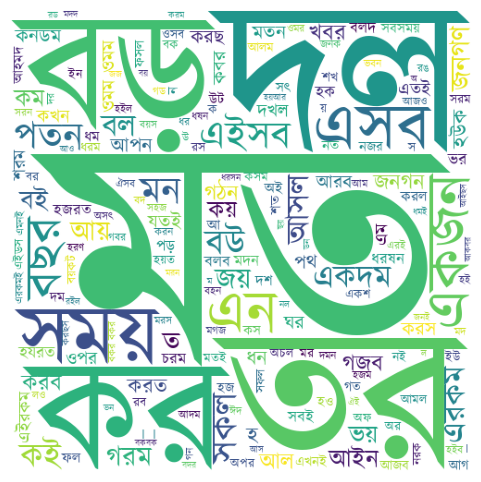

In [62]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)
plt.axis('off')  # to turn off axis if needed
plt.savefig('spam_wordcloud.png', bbox_inches='tight', pad_inches=1)

In [63]:
df.head()

,text,target,Label,num_words,num_sentences,num_characters,transformed_text
0,এলাকায় আসিস খুন ফেলে রাখবো তকে আমারে ত চিনিস ত...,0,1,12,1,58,ত
1,কুরআন কিতাব টাই ভুল অন্য ধর্ম ঝাড়া আল্লাহ কাল্...,0,1,19,1,110,
2,বাংলাদেশি খেলোয়ারদের খারাপ আচরনের আইসিসি আদালত...,1,0,11,1,80,কর
3,তুই ভুলে যাইস আগের কথা সামনে পাইলে ছিড়া ফেলমু,0,1,9,1,45,
4,কেনো শুধু শুধু অন্যের ঘাড়ে পা রেখে উপরে উঠতে চ...,1,0,32,1,187,মই


# This section is for model creating and building

In [64]:
x = df.text.values
y = df.target.values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
cv = CountVectorizer()
x_train=cv.fit_transform(xtrain)

In [69]:
x_train.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [70]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# This is for multinomialNB

In [71]:
x_train_dense = x_train.toarray()
model = MultinomialNB()
model.fit(x_train_dense,ytrain)

MultinomialNB()

In [72]:
x_test= cv.transform(xtest)

In [73]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
x_test_dense = x_test.toarray()
accuracy = model.score(x_test_dense, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.777744630071599


In [75]:
model.score(x_train_dense,ytrain)

0.8282608695652174

In [76]:
pred = model.predict(x_test_dense)
pred

array([1, 0, 1, ..., 1, 1, 0])

In [77]:
confusion_matrix(ytest,pred)

array([[1217,  421],
       [ 324, 1390]], dtype=int64)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      1638
           1       0.77      0.81      0.79      1714

    accuracy                           0.78      3352
   macro avg       0.78      0.78      0.78      3352
weighted avg       0.78      0.78      0.78      3352



# This is for bernouliNB

In [79]:
x_train_dense = x_train.toarray()
model1 = BernoulliNB()
model1.fit(x_train_dense,ytrain)

BernoulliNB()

In [80]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [81]:
x_test_dense = x_test.toarray()
accuracy = model1.score(x_test_dense, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.7526849642004774


In [82]:
model1.score(x_train_dense,ytrain)

0.7847826086956522

In [83]:
pred = model1.predict(x_test_dense)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [84]:
confusion_matrix(ytest,pred)

array([[1469,  169],
       [ 660, 1054]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78      1638
           1       0.86      0.61      0.72      1714

    accuracy                           0.75      3352
   macro avg       0.78      0.76      0.75      3352
weighted avg       0.78      0.75      0.75      3352



# This is for Random forest classifier

In [86]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=190, random_state=100)
rf_model.fit(x_train, ytrain)

RandomForestClassifier(n_estimators=190, random_state=100)

In [87]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [88]:
accuracy = rf_model.score(x_test, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.7819212410501193


In [89]:
rf_model.score(x_train,ytrain)

0.9956521739130435

In [90]:
pred = rf_model.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [91]:
confusion_matrix(ytest,pred)

array([[1311,  327],
       [ 404, 1310]], dtype=int64)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1638
           1       0.80      0.76      0.78      1714

    accuracy                           0.78      3352
   macro avg       0.78      0.78      0.78      3352
weighted avg       0.78      0.78      0.78      3352



# logistic regression

In [93]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=1)
lr_model.fit(x_train, ytrain)

LogisticRegression(random_state=1)

In [94]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [95]:
accuracy = lr_model.score(x_test, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.8081742243436754


In [96]:
pred = lr_model.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [97]:
confusion_matrix(ytest,pred)

array([[1371,  267],
       [ 376, 1338]], dtype=int64)

In [98]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1638
           1       0.83      0.78      0.81      1714

    accuracy                           0.81      3352
   macro avg       0.81      0.81      0.81      3352
weighted avg       0.81      0.81      0.81      3352



In [99]:
# here 0 means spam 1 non spam

In [100]:
cleaned=["﻿ভাল খাদ্য ভাল সেবা বিশেষ করে কাবাব "]

In [101]:
cv_cleaned=cv.transform(cleaned)

In [102]:
cv_cleaned_dense = cv_cleaned.toarray()

In [103]:
cv_cleaned_dense = cv_cleaned.toarray()

In [104]:
lr_model.predict(cv_cleaned_dense)

array([0])

# This is for support vector machine

In [105]:
from sklearn.svm import SVC
kernel_options = ['linear', 'rbf', 'poly', 'sigmoid']
svm_models = {}
# Loop through the kernel options and fit separate models for each
for kernel in kernel_options:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(x_train, ytrain)
    svm_models[kernel] = svm_model
    
svm_model1 = svm_models['linear']

In [106]:
x_test= cv.transform(xtest)
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
accuracy = svm_model1.score(x_test, ytest)
print("Accuracy:", accuracy)

Accuracy: 0.7998210023866349


In [108]:
svm_model1.score(x_train,ytrain)

0.9074168797953964

In [109]:
cleaned=["পুজোর সময়ে আজান বন্ধ করতে হলে মুসলিম রাষ্ট্র থেকে হিন্দুদের বিতারিত করতে হবে"]

In [110]:
cv_cleaned=cv.transform(cleaned)

In [111]:
cv_cleaned_dense = cv_cleaned.toarray()

In [112]:
svm_model1.predict(cv_cleaned_dense)

array([1])

In [113]:
pred = svm_model1.predict(x_test)
pred

array([1, 0, 1, ..., 0, 0, 0])

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy_score(ytest,pred)

0.7998210023866349

In [116]:
confusion_matrix(ytest,pred)

array([[1383,  255],
       [ 416, 1298]], dtype=int64)

In [117]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1638
           1       0.84      0.76      0.79      1714

    accuracy                           0.80      3352
   macro avg       0.80      0.80      0.80      3352
weighted avg       0.80      0.80      0.80      3352



# Cross validation for svm

In [118]:
from sklearn.model_selection import cross_val_score

In [119]:
x = df.text.values
y = df.target.values

In [120]:
cv = CountVectorizer()
x_train=cv.fit_transform(x)

In [121]:
cvscore = cross_val_score(svm_model1,x_train,y,cv=5)

In [122]:
cvscore

array([0.81297539, 0.80402685, 0.81602507, 0.80572963, 0.79006267])

In [123]:
cvscore.mean()

0.8057639210172663

# Cross validation for logistic regression

In [124]:
from sklearn.model_selection import cross_val_score

In [125]:
x = df.text.values
y = df.target.values

In [126]:
cv = CountVectorizer()
x_train=cv.fit_transform(x)

In [127]:
cvscore = cross_val_score(lr_model,x_train,y,cv=5)

In [128]:
cvscore

array([0.82237136, 0.80760626, 0.82184423, 0.81154879, 0.80707252])

In [129]:
cvscore.mean()

0.814088632262432